<a href="https://colab.research.google.com/github/sineefa/image-processing/blob/main/EG_2019_3746_assignment%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

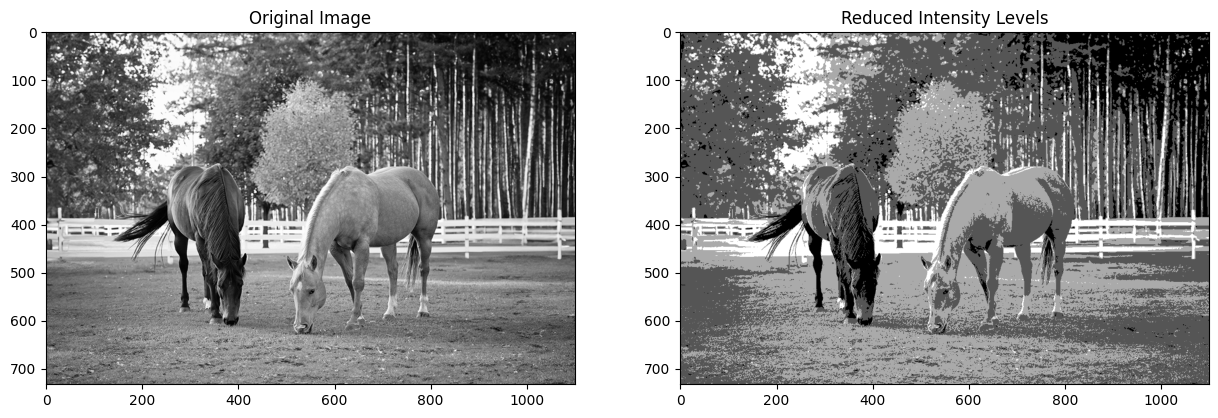

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to reduce the number of intensity levels in an image
def reduce_intensity_levels(image, levels):
    max_val = 255
    ratio = max_val / (2 ** levels - 1)
    reduced_image = np.round(image / ratio) * ratio
    return reduced_image.astype(np.uint8)

# Load the image
image = cv2.imread('horse.jpg', cv2.IMREAD_GRAYSCALE)

# Reduce intensity levels
reduced_levels = 2  #reduce intensity level to two
reduced_image = reduce_intensity_levels(image, reduced_levels)

# Display original and reduced intensity images
plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reduced_image, cmap='gray')
plt.title('Reduced Intensity Levels')
plt.show()

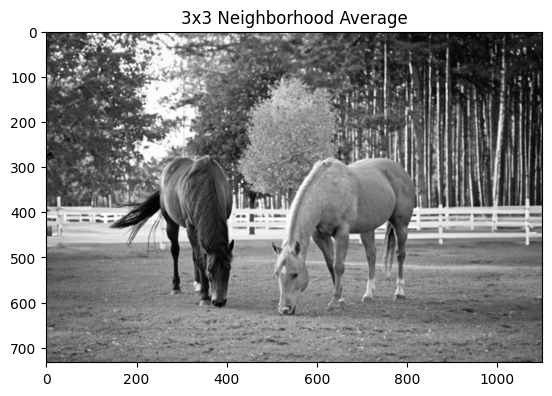

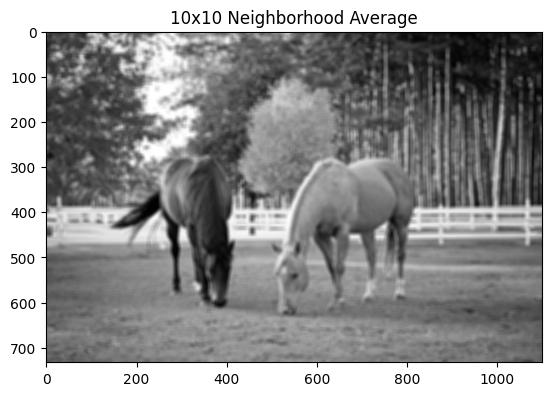

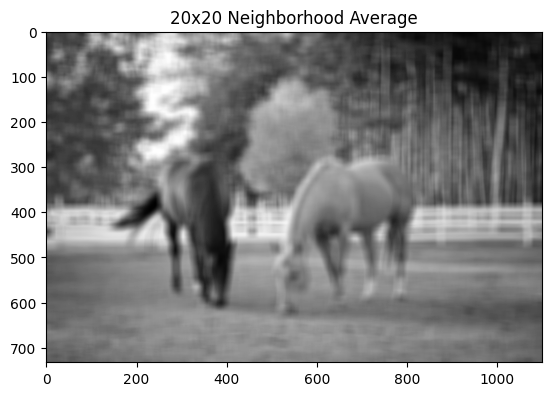

In [ ]:
# Function to perform spatial averaging on an image
def spatial_average(image, neighborhood_size):
    kernel = np.ones((neighborhood_size, neighborhood_size), np.float32) / (neighborhood_size ** 2)
    return cv2.filter2D(image, -1, kernel)


# Perform spatial averaging in an image
neighborhood_sizes = [3, 10, 20]
averaged_images = [spatial_average(image, size) for size in neighborhood_sizes]

# Display the results
# Display the results
for size, averaged_image in zip(neighborhood_sizes, averaged_images):
    plt.imshow(averaged_image, cmap='gray')
    plt.title(f'{size}x{size} Neighborhood Average')
    plt.show()


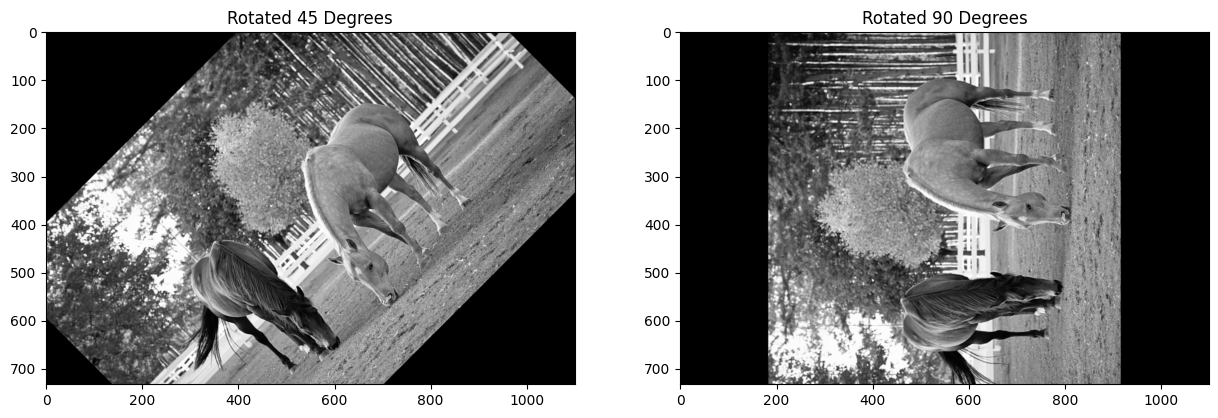

In [ ]:
# Function to rotate an image by a specified angle
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

# Rotate the image by 45 and 90 degrees
rotated_45_degrees = rotate_image(image, 45)
rotated_90_degrees = rotate_image(image, 90)

# Display the results
plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.imshow(rotated_45_degrees, cmap='gray')
plt.title('Rotated 45 Degrees')
plt.subplot(1, 2, 2)
plt.imshow(rotated_90_degrees, cmap='gray')
plt.title('Rotated 90 Degrees')
plt.show()

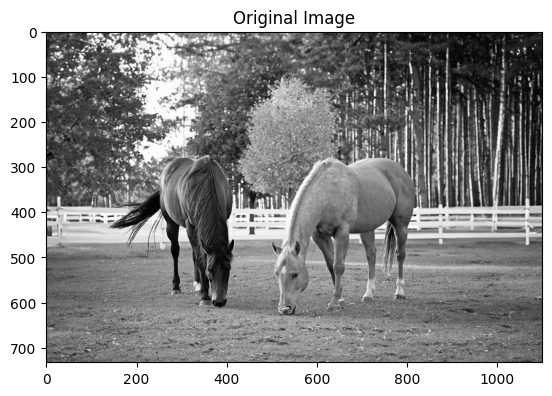

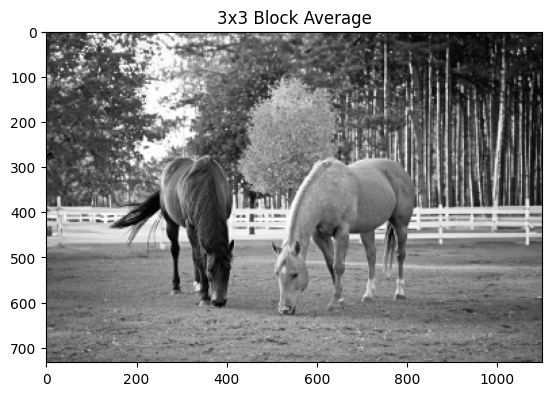

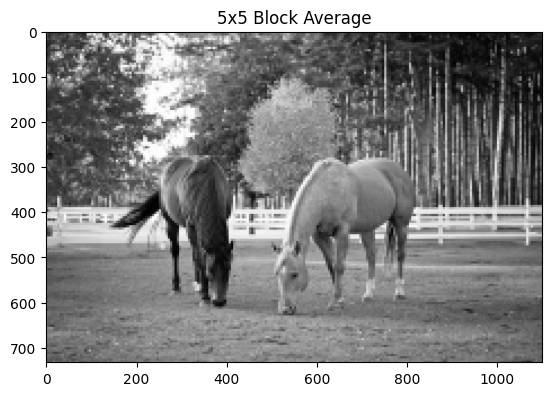

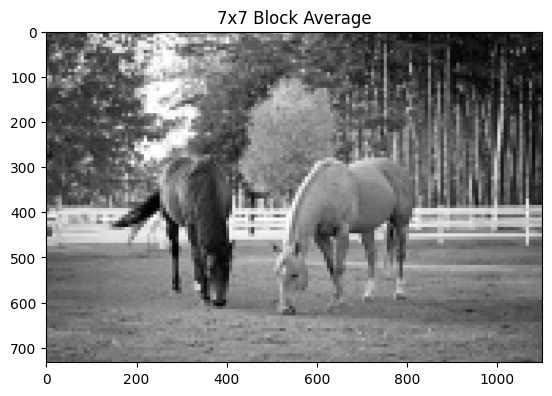

In [ ]:
# Function to perform block averaging on an image
def block_average(image, block_size):
    result = np.zeros_like(image)
    for i in range(0, image.shape[0], block_size):
        for j in range(0, image.shape[1], block_size):
            block = image[i:i+block_size, j:j+block_size]
            mean = np.mean(block)
            result[i:i+block_size, j:j+block_size] = mean
    return result

# Perform block averaging for 3x3, 5x5, and 7x7 blocks
block_sizes = [3, 5, 7]
block_average_images = [block_average(image, size) for size in block_sizes]

# Display the original and block-averaged images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()
for i in range(len(block_sizes)):
    plt.imshow(block_average_images[i], cmap='gray')
    plt.title(f'{block_sizes[i]}x{block_sizes[i]} Block Average')
    plt.show()